In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris_data = iris.data
iris_label=iris.target
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# 학습용 검증용 데이터 분리
X_train, X_test, y_train, y_test =train_test_split(iris_data,iris_label,test_size = 0.2,random_state=11)

In [13]:
#decision Tree 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

In [15]:
#학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [16]:
# 예측 수행
pred = dt_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print('예측 정확도 = {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 = 0.9333


교차검증
- K Fold
- Stratified K Fold
- cross_val_score

In [24]:
from sklearn.model_selection import KFold
import numpy as np

features = iris.data
iris_label=iris.target
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits = 5)
cv_accuracy = []

n_iter = 0

for train_index,test_index in kfold.split(features):
    
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index],label[test_index]
    
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter +=1
    
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy, train_size,test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도: ',np.mean(cv_accuracy))


#1 교차검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도:  0.9


In [26]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data,columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [28]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index,test_index in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('## 교차검증 : {0}'.format(n_iter))
    print('학습레이블 데이터 분포:\n',label_train.value_counts())
    print('검증레이블 데이터 분포:\n',label_test.value_counts())

## 교차검증 : 1
학습레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차검증 : 2
학습레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차검증 : 3
학습레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [59]:
#stratirfiedKFold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df,iris_df['label']):
    label_train = iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print('## 교차검증 : {0}'.format(n_iter))
    print('학습레이블 데이터 분포:\n',label_train.value_counts())
    print('검증레이블 데이터 분포:\n',label_test.value_counts())

## 교차검증 : 0
학습레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차검증 : 0
학습레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차검증 : 0
학습레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [62]:
# 상기 케이스에 대한 교차 검증 수행
# 각 회차별 교차 검증 정확도 및 검증 세트 인덱스
# 평균 검증 정확도
dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skfold.split(features,label):
    X_train, X_test= features[train_index],features[test_index]
    y_train,y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
    print('\n#{0} 검증 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도: ',np.round(cv_accuracy,4))
print('## 평균 검증 정확도', np.mean(cv_accuracy))


#1 교차검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#1 검증 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차검증 정확도 : 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#2 검증 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#3 검증 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도:  [0.98 0.94 0.98]
## 평균 검증 정확도 0.9666666666666667


In [33]:
# cross_val_score() : 알고리즘을 통한 학습, 교차 검증을 보다 간편하게 하고 평가 방법을 선택

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [38]:
iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris.data
label = iris.target

scores = cross_val_score(dt_clf,data,label,scoring = 'accuracy',cv = 3)


In [40]:
# GridSearchCV - 교차검즏과 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

iris = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}
grid_dtree = GridSearchCV(dtree,param_grid = parameters,cv = 3, refit = True)

grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [43]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: ', grid_dtree.best_score_)

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.975


In [44]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)

print('테스트 데이터 정확도: ',accuracy_score(y_test,pred))

테스트 데이터 정확도:  0.9666666666666667


In [46]:
# 데이터 인코딩
# 레이블 인코딩

from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌디','컴퓨터','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[0 1 4 5 3 2 2]


In [49]:
# 원 핫 인코딩

from sklearn.preprocessing import OneHotEncoder

import numpy as np

items = ['TV','냉장고','전자렌디','컴퓨터','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print(oh_labels.toarray())
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(7, 6)


In [51]:
df = pd.DataFrame({'item':items})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌디,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0


In [56]:
# 피처 스케일링과 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled,columns = ['sl','sw','pl','pw','target'])


print('feature들의 평균값')
print(iris_df_scaled.mean())

print(iris_df_scaled.var())

feature들의 평균값
sl       -4.736952e-16
sw       -7.815970e-16
pl       -4.263256e-16
pw       -4.736952e-16
target   -1.421085e-16
dtype: float64
sl        1.006711
sw        1.006711
pl        1.006711
pw        1.006711
target    1.006711
dtype: float64


In [58]:
# minmaxscaler : 데이터를 0과 1 사이의 범위 값으로 변환

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled)

print(iris_df_scaled.min())
print(iris_df_scaled.max())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [170]:
# train.csv 데이터로 생존자 분석 예측을 위한 분석용 데이터셋을 하나의 전처리 사용자 함수를 이용하여 작성한 후 모델링 및 성능 평가를 수행. 단,전처리는 5개 이상, 시각적 탐색 3가지 이상, 정확도는 0.85 이상


tdf = pd.read_csv('./dataset/train.csv')
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [171]:
import re
def callname(x):
    m = re.compile('[A-Za-z]+[.]')
    p = re.findall(m,x)
    return p[0]

tdf['Callname']=tdf.Name.apply(lambda x:callname(x))
tdf['Callname'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Callname, dtype: int64

In [172]:
tdf1 = tdf.loc[tdf.Age.isnull()]
tdf1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Callname
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr.
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs.
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr.
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr.
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss.
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr.
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr.


In [173]:
list(set(tdf1.Callname.values.tolist()))

['Master.', 'Dr.', 'Mr.', 'Mrs.', 'Miss.']

In [174]:
tdf2 = tdf.loc[tdf.Age.notnull()]
tdf2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Callname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs.
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [175]:
pivot = pd.pivot_table(tdf2, index = 'Callname', values = 'Age',aggfunc = 'mean')

pivot.loc['Master.'][0]

4.574166666666667

In [176]:
tdf.loc[(tdf.Age.isnull())&(tdf.Callname == 'Master.'),['Age']]=(pivot.loc['Master.'][0])
tdf.loc[(tdf.Age.isnull())&(tdf.Callname == 'Dr.'),['Age']]=(pivot.loc['Dr.'][0])
tdf.loc[(tdf.Age.isnull())&(tdf.Callname == 'Mr.'),['Age']]=(pivot.loc['Mr.'][0])
tdf.loc[(tdf.Age.isnull())&(tdf.Callname == 'Mrs.'),['Age']]=(pivot.loc['Mrs.'][0])
tdf.loc[(tdf.Age.isnull())&(tdf.Callname == 'Miss.'),['Age']]=(pivot.loc['Miss.'][0])

In [177]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Callname         0
dtype: int64

In [178]:
tdf.Embarked.fillna(method = 'ffill',inplace = True)

In [179]:
tdf3 = tdf.loc[tdf.Cabin.notnull()]
tdf3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Callname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss.
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs.
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr.
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.


In [182]:
tdf4 = tdf.loc[tdf.Cabin.isnull()]
tdf4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Callname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,NaN,Q,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr.
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q,Mrs.
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,NaN,S,Miss.


In [186]:
tdf41 = tdf4.loc[tdf4.Pclass == 1]
list(tdf41.index)

[30,
 34,
 35,
 64,
 83,
 155,
 168,
 187,
 256,
 258,
 270,
 290,
 295,
 306,
 334,
 373,
 375,
 380,
 383,
 447,
 467,
 493,
 507,
 513,
 537,
 545,
 555,
 557,
 602,
 604,
 607,
 633,
 660,
 694,
 708,
 766,
 793,
 822,
 842,
 856]

In [149]:
p = re.compile('[A-Z]')
m = re.search(p,tdf.loc[1,'Cabin'])
print(m.group(0))

C


In [150]:
def cabin_first(x):
    p = re.compile('[A-Z]')
    m = re.search(p,x)
    return m.group(0)

tdf3['Cabins'] = tdf3.Cabin.apply(lambda x:cabin_first(x))

C:\Users\Master\AppData\Local\Temp/ipykernel_23740/1680484049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf3['Cabins'] = tdf3.Cabin.apply(lambda x:cabin_first(x))


In [151]:
list(set(tdf3.Cabins.values.tolist()))

['A', 'T', 'F', 'B', 'C', 'G', 'E', 'D']

In [152]:
tdf3.Cabins.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabins, dtype: int64

In [153]:
tdf31 = tdf3.loc[tdf3.Pclass == 1]
list(set(tdf31.Cabins.values.tolist()))

['A', 'T', 'B', 'C', 'E', 'D']

In [154]:
tdf31.Cabins.value_counts()

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabins, dtype: int64

In [155]:
tdf32 = tdf3.loc[tdf3.Pclass == 2]
list(set(tdf32.Cabins.values.tolist()))

['F', 'E', 'D']

In [156]:
tdf32.Cabins.value_counts()

F    8
D    4
E    4
Name: Cabins, dtype: int64

In [157]:
tdf33 = tdf3.loc[tdf3.Pclass == 3]
list(set(tdf33.Cabins.values.tolist()))

['F', 'E', 'G']

In [134]:
tdf33.Cabins.value_counts()

F    5
G    4
E    3
Name: Cabins, dtype: int64

In [158]:
tdf.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [187]:
tdf.loc[(tdf.Pclass == 1)&(tdf.Cabin.isnull()),[30,'Cabin']] = (np.random.choice(['A', 'B', 'C', 'E', 'D']))

In [188]:
tdf.iloc[30]

PassengerId                          31
Survived                              0
Pclass                                1
Name           Uruchurtu, Don. Manuel E
Sex                                male
Age                                40.0
SibSp                                 0
Parch                                 0
Ticket                         PC 17601
Fare                            27.7208
Cabin                                 A
Embarked                              C
Callname                           Don.
30                                    A
Name: 30, dtype: object

In [159]:
tdf.loc[(tdf.Pclass == 1)&(tdf.Cabin.isnull()),['Cabin']] = (np.random.choice(['A', 'B', 'C', 'E', 'D']))
tdf.loc[(tdf.Pclass == 2)&(tdf.Cabin.isnull()),['Cabin']] = (np.random.choice(['F', 'E', 'D']))
tdf.loc[(tdf.Pclass == 3)&(tdf.Cabin.isnull()),['Cabin']] = (np.random.choice(['F', 'E', 'G']))

In [161]:
def cabin_first(x):
    p = re.compile('[A-Z]')
    m = re.search(p,x)
    return m.group(0)

tdf['Cabins'] = tdf.Cabin.apply(lambda x:cabin_first(x))

In [163]:
def age_cat(x):
    cat = 0
    if x<10:
        cat = 1
    elif x<20:
        cat = 2
    elif x<30:
        cat = 3
    elif x<40:
        cat = 4
    elif x<50:
        cat = 5
    elif x<60:
        cat = 6
    else:
        cat = 7
    return cat
        
tdf['Age_cat'] = tdf.Age.apply(lambda x: age_cat(x))
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Callname,Cabins,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F,S,Mr.,F,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F,S,Miss.,F,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F,S,Mr.,F,4


In [164]:
tdf.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin'],axis = 1,inplace = True)
tdf

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Callname,Cabins,Age_cat
0,0,3,male,1,0,S,Mr.,F,3
1,1,1,female,1,0,C,Mrs.,C,4
2,1,3,female,0,0,S,Miss.,F,3
3,1,1,female,1,0,S,Mrs.,C,4
4,0,3,male,0,0,S,Mr.,F,4
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Rev.,E,3
887,1,1,female,0,0,S,Miss.,B,2
888,0,3,female,1,2,S,Miss.,F,3
889,1,1,male,0,0,C,Mr.,C,3


In [165]:
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

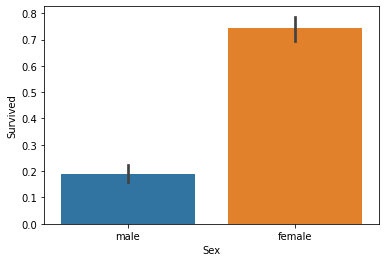

In [166]:
sns.barplot(x='Sex',y='Survived',data = tdf)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

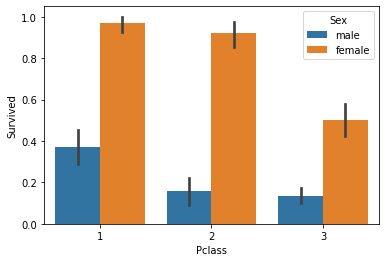

In [167]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data = tdf)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

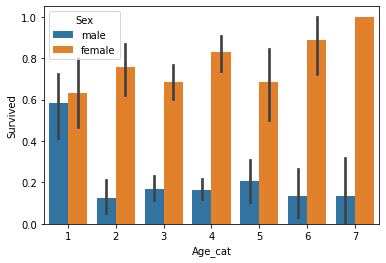

In [168]:
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data = tdf)